<a href="https://colab.research.google.com/github/hyakuroume/-/blob/main/%E9%87%8F%E5%AD%90%E5%8C%96%E5%AD%A6%E8%A8%88%E7%AE%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyscf geometric py3Dmol > /dev/null

In [2]:
from pyscf import gto, scf, dft, mp, cc, mcscf
from pyscf.geomopt import geometric_solver
import matplotlib.pyplot as plt
import sys

In [3]:
# 分子の定義
mol = gto.M(atom="H 0 0 0; F 0 0 1.1", basis="ccpvdz")

In [4]:
# hartree-fock計算の実行
mf = scf.RHF(mol)
energy = mf.kernel()

print("Energy:", energy)

converged SCF energy = -99.9873974403489
Energy: -99.98739744034889


In [5]:
# H2O分子の定義
h2o_mol = gto.M(
    atom = """
    O 0.0 0.0 0.1173
    H 0.0 0.7572 -0.4692
    H 0.0 -0.7572 -0.4692
    """,
    basis = "cc-pVDZ",
    charge=0,
    spin=0
)

In [6]:
# DFT計算の設定
mf = dft.RKS(h2o_mol)
mf.xc = 'B3LYP'
energy = mf.kernel()

print('DFT Energy with B3YLP functional:', energy)

/usr/local/lib/python3.11/dist-packages/pyscf/dft/libxc.py:512: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -76.4203688915021
DFT Energy with B3YLP functional: -76.42036889150211


In [7]:
# 分子の定義
h2O_mol = gto.M(
    atom='''O 0.0 0.0 0.0; H 0.0 -0.757 0.587; H 0.0 0.757 0.587''',
    basis='cc-pVDZ'
)

In [8]:
# 計算方法の選択と実行
mf = dft.RKS(h2o_mol)
mf.xc = 'B3LYP'
energy = mf.kernel()

print("Energy:", energy)

converged SCF energy = -76.420368891502
Energy: -76.420368891502


In [9]:
hartree_to_eV = 27.2114

energy_ev = energy * hartree_to_eV

print("Energy (eV):", energy_ev)

Energy (eV): -2079.5052260542175


## MP2計算

In [10]:
# 水分子の定義
h2o_mol = gto.M(atom='O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587;', basis='cc-pVDZ')

# ハートリー・フォック計算
mf = scf.RHF(mol)
mf.kernel()

# # MP2計算
mp2 = mp.MP2(mf)
mp2.kernel()

print("MP2 Energy:", mp2.e_tot)

converged SCF energy = -99.9873974403489
E(MP2) = -100.198764900601  E_corr = -0.211367460252204
E(SCS-MP2) = -100.193014429233  E_corr = -0.205616988884259
MP2 Energy: -100.19876490060109


## CCSD計算

In [11]:
h2o_mol = gto.M(atom="O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587", basis="cc-pVDZ")

mf = scf.RHF(mol).run()
ccsd = cc.CCSD(mf).run()

print('CCSD Energy:', ccsd.e_tot)

converged SCF energy = -99.9873974403489
E(CCSD) = -100.2037350682675  E_corr = -0.2163376279185488
CCSD Energy: -100.20373506826749


## MCSCF計算

In [12]:
h2o_mol = gto.M(atom='O 0 0 0; H 0 -0.757 0.587; H 0 0.757 0.587', basis='cc-pVDZ')

mf = scf.RHF(mol).run()
mc = mcscf.CASSCF(mf, 4, 4).run()

print('MCSCF Energy:', mc.e_tot)

converged SCF energy = -99.9873974403489
CASSCF energy = -100.047300349793
CASCI E = -100.047300349793  E(CI) = -7.16439088131489  S^2 = 0.0000000
MCSCF Energy: -100.04730034979278


## 構造最適化計算

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os

# 計算結果を保存するパスを設定
folder_path = "/content/drive/MyDrive/pyscf"
base_filename = "cfcf"

# フルパスの設定
path = os.path.join(folder_path, base_filename)

# フォルダが存在しない場合は作成
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Created folder: {folder_path}")

# チェックポイントファイル名の設定
checkpoint_file = path + ".chk"
print(f"Checkpoint file will be saved as: {checkpoint_file}")

Checkpoint file will be saved as: /content/drive/MyDrive/pyscf/cfcf.chk


In [15]:
from pyscf import gto

mol = gto.M(
    atom = """
    F        0.2814445108      4.6220522399      0.8468305958
    F       -2.8576297500      4.3345350708     -0.8468304265
    C       -0.5710910263      4.5571375244     -0.2399080182
    C       -2.0050933218      4.3994411297      0.2399080055
    H       -0.4731551822      5.4891660861     -0.8356386849
    H       -2.1030307042      3.4674093695      0.8356334763
    H       -0.2879731697      3.6901718904     -0.8734525221
    H       -2.2882089988      5.2664037321      0.8734575742
    """,
    basis="6-31G(d)",
    charge=0, # 分子全体の電荷
    spin=0, # スピン多重度(2s)
    symmetry=True,
    verbose=4
)

System: uname_result(system='Linux', node='6741d326cab6', release='6.1.123+', version='#1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025', machine='x86_64')  Threads 2
Python 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
numpy 2.0.2  scipy 1.15.3  h5py 3.13.0
Date: Mon Jun 16 14:44:03 2025
PySCF version 2.9.0
PySCF path  /usr/local/lib/python3.11/dist-packages/pyscf

[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 8
[INPUT] num. electrons = 34
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry True subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 F      0.281444510800   4.622052239900   0.846830595800 AA    0.531853044674   8.734412866843   1.600277899964 Bohr   0.0
[INPUT]  2 F     -2.857629750000   4.334535070800  -0.846830426500 AA   -5.400137592909   8.191084161134  -1.600277580034 Bohr   0.0


In [16]:
# DFT計算の設定
mf = dft.RKS(mol)
mf.chkfile = path + '.chk'
mf.xc = 'B3LYP'
mf.max_cycle = 150

In [17]:
# 各ステップのエネルギーと分子構造の保存リスト
energies = []
geometries = []

In [18]:
# コールバック関数の定義
def cb(envs):
    mf = envs['g_scanner'].base
    energies.append(mf.e_tot)
    geometries.append(mol.atom_coords(unit="ANG"))

In [19]:
conv_params = {
    'convergence_energy' : 1e-6,
    'convergence_grms' : 3e-4,
    'convergence_gmax' : 4.5e-4,
    'convergence_drms' : 1.2e-3,
    'convergence_dmax' : 1.8e-3
}

In [20]:
# 構造最適化を実行
geometric_solver.optimize(mf, callback=cb, **conv_params)

Create scanner for <class 'pyscf.grad.rks.Gradients'>
Create scanner for <class 'pyscf.dft.rks_symm.SymAdaptedRKS'>


geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-1e6073a9-0b85-49fa-a88d-3b50e3b3482c.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.281445   4.622052   0.846831    0.000000  0.000000  0.000000
   F  -2.857630   4.334535  -0.846830    0.000000  0.000000  0.000000
   C  -0.571091   4.557138  -0.239908    0.000000  0.000000  0.000000
   C  -2.005093   4.399441   0.239908    0.000000  0.000000  0.000000
   H  -0.473155   5.489166  -0.835639    0.000000  0.000000  0.000000
   H  -2.103031   3.467409   0.835633    0.000000  0.000000  0.000000
   H  -0.287973   3.690172  -0.873453    0.000000  0.000000  0.000000
   H  -2.288209   5.266404   0.873458    0.000000  0.000000 -0.000000
New geometry
   1 F      1.100095575471   4.704304925863   0.942703608703 AA    2.078879348486   8.889847916323   1.781451637088 Bohr

   2 F     -2.038978685329   4.416787756760  -0.750957413597 AA   -3.853111289097   8.346519210609  -1.419103842910 Bohr

   3 C      0.247560038357   4.639390210352  -0.1440350

Step    0 : Gradient = 1.048e-02/1.674e-02 (rms/max) Energy = -278.2734582164
Hessian Eigenvalues: 2.30000e-02 5.00000e-02 5.00000e-02 ... 3.25494e-01 4.86008e-01 4.86008e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.263241   4.620104   0.850333   -0.836855 -0.084201 -0.092370
   F  -2.839426   4.336482  -0.850333   -0.800447 -0.080306 -0.099376
   C  -0.574082   4.557028  -0.249340   -0.821642 -0.082362 -0.105305
   C  -2.002103   4.399551   0.249340   -0.815660 -0.082143 -0.086441
   H  -0.470930   5.475861  -0.838843   -0.816426 -0.095557 -0.099078
   H  -2.105256   3.480715   0.838839   -0.820877 -0.068948 -0.092668
   H  -0.288517   3.703773  -0.876092   -0.819195 -0.068652 -0.098513
   H  -2.287665   5.252803   0.876097   -0.818107 -0.095853 -0.093234
New geometry
   1 F      1.081891714803   4.702356564549   0.946206434544 AA    2.044479037414   8.886166047047   1.788071018589 Bohr

   2 F     -2.020774640858   4.418734332455  -0.754460276975 AA   -3.818710630687   8.350197705553  -1.425723295347 Bohr

   3 C      0.244569267004   4.639280582556  -0.1534672

Step    1 : Displace = 1.429e-02/1.717e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 2.129e-03/3.136e-03 (rms/max) E (change) = -278.2741465979 (-6.884e-04) Quality = 0.970
Hessian Eigenvalues: 2.30000e-02 4.99534e-02 5.00000e-02 ... 3.25494e-01 4.86008e-01 5.10858e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.266627   4.620390   0.853270   -0.815265 -0.081966 -0.092936
   F  -2.842812   4.336194  -0.853270   -0.822037 -0.082540 -0.098810
   C  -0.573737   4.557040  -0.248213   -0.818306 -0.082241 -0.094746
   C  -2.002447   4.399539   0.248213   -0.818996 -0.082265 -0.097000
   H  -0.470912   5.476105  -0.836065   -0.818633 -0.082009 -0.093094
   H  -2.105275   3.480471   0.836061   -0.818669 -0.082496 -0.098651
   H  -0.288438   3.703423  -0.873327   -0.818572 -0.082603 -0.093107
   H  -2.287744   5.253154   0.873330   -0.818731 -0.081902 -0.098639
New geometry
   1 F      1.085278037460   4.702642897101   0.949143363582 AA    2.050878259805   8.886707137152   1.793621010119 Bohr

   2 F     -2.024160861929   4.418447013014  -0.757397226760 AA   -3.825109661109   8.349654750499  -1.431273326082 Bohr

   3 C      0.244913920331   4.639292230621  -0.1523402

Step    2 : Displace = 2.666e-03/4.514e-03 (rms/max) Trust = 1.414e-01 (+) Grad = 8.002e-04/1.367e-03 (rms/max) E (change) = -278.2741772644 (-3.067e-05) Quality = 1.223
Hessian Eigenvalues: 2.30000e-02 4.82727e-02 5.00000e-02 ... 3.25494e-01 4.19692e-01 4.86008e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.265791   4.620251   0.855784   -0.819487 -0.082392 -0.093359
   F  -2.841976   4.336333  -0.855784   -0.817815 -0.082114 -0.098387
   C  -0.573829   4.557026  -0.248008   -0.818743 -0.082267 -0.095667
   C  -2.002355   4.399552   0.248008   -0.818559 -0.082239 -0.096079
   H  -0.469401   5.477148  -0.834231   -0.817140 -0.081210 -0.094040
   H  -2.106785   3.479428   0.834228   -0.820162 -0.083296 -0.097706
   H  -0.286738   3.702634  -0.871532   -0.816952 -0.083041 -0.094079
   H  -2.289444   5.253942   0.871535   -0.820350 -0.081464 -0.097668
New geometry
   1 F      1.084441888708   4.702503376405   0.951657093040 AA    2.049298167664   8.886443481249   1.798371270346 Bohr

   2 F     -2.023324589562   4.418585332813  -0.759910981464 AA   -3.823529335370   8.349916137036  -1.436023634016 Bohr

   3 C      0.244822261931   4.639278337115  -0.1521346

Step    3 : Displace = 9.297e-04/1.046e-03 (rms/max) Trust = 2.000e-01 (+) Grad = 1.174e-04/2.107e-04 (rms/max) E (change) = -278.2741825002 (-5.236e-06) Quality = 1.132
Hessian Eigenvalues: 2.30000e-02 3.71076e-02 5.00000e-02 ... 3.25494e-01 4.50836e-01 4.86008e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   F   0.264331   4.620050   0.858162   -0.820111 -0.082453 -0.093495
   F  -2.840515   4.336533  -0.858162   -0.817191 -0.082052 -0.098251
   C  -0.573677   4.557024  -0.247174   -0.818499 -0.082255 -0.095040
   C  -2.002507   4.399554   0.247174   -0.818803 -0.082251 -0.096706
   H  -0.468114   5.477407  -0.832740   -0.817365 -0.081994 -0.094382
   H  -2.108072   3.479169   0.832737   -0.819937 -0.082511 -0.097364
   H  -0.285420   3.702581  -0.870048   -0.817333 -0.082305 -0.094389
   H  -2.290762   5.253995   0.870051   -0.819970 -0.082200 -0.097357
New geometry
   1 F      1.552423001047   0.141758718696   0.858162130170 AA    2.933654301455   0.267885154104   1.621691396495 Bohr

   2 F     -1.552423001047  -0.141758718696  -0.858162130170 AA   -2.933654301455  -0.267885154104  -1.621691396495 Bohr

   3 C      0.714414927396   0.078734739422  -0.2471743

Step    4 : Displace = 2.303e-04/3.545e-04 (rms/max) Trust = 2.828e-01 (+) Grad = 7.030e-05/1.196e-04 (rms/max) E (change) = -278.2741827655 (-2.653e-07) Quality = 0.532
Hessian Eigenvalues: 2.30000e-02 3.71076e-02 5.00000e-02 ... 3.25494e-01 4.50836e-01 4.86008e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 82.348 seconds


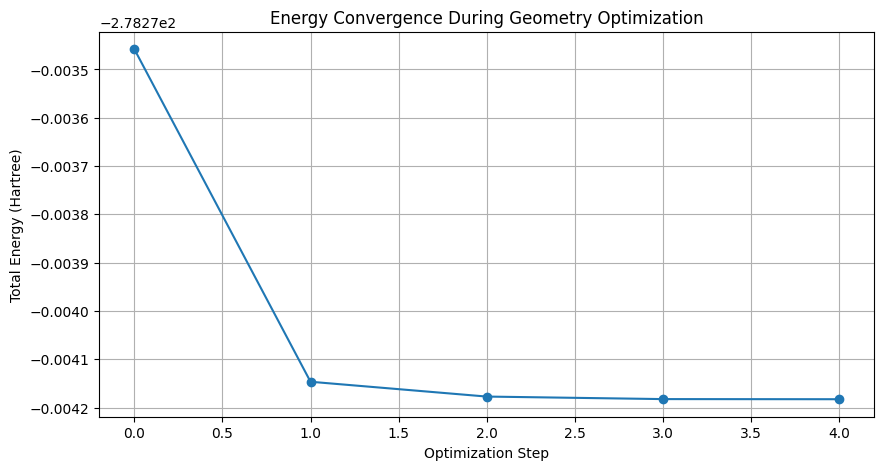

In [21]:
# エネルギー収束のプロット
plt.figure(figsize=(10, 5))
plt.plot(energies, marker='o')
plt.title('Energy Convergence During Geometry Optimization')
plt.xlabel('Optimization Step')
plt.ylabel('Total Energy (Hartree)')
plt.grid(True)
plt.show()

In [22]:
# ジオメトリーの保存
for i, coords in enumerate(geometries):
    filename = f"{path}_geometry_step_{i+1}.xyz"
    with open(filename, 'w') as f:
        f.write(f"{mol.natm}\\\\n")
        f.write(f"Step {i+1} Energy: {energies[i]}\\\\n")

        for j in range(mol.natm):
            symbol = mol.atom_pure_symbol(j)
            x, y, z = coords[j]
            f.write(f"{symbol} {x:.6f} {y:.6f} {z:.6f}\\\\n")
print("All geometries have been saved.")

All geometries have been saved.


## 分子構造の可視化

In [23]:
import ipywidgets
from ipywidgets import interact
import py3Dmol

# モデルのXYZ座標をファイルから読み込む
def read_xyz(file_path):
    try:
        with open(file_path, 'r') as file:
            return file.read()
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists.")
        return "" # ファイルが見つからない場合は空文字列を返す

# py3Dmolでのビューアを設定する関数
def show_structure(xyz_content, style):
    if not xyz_content: # XYZコンテンツが空の場合は表示しない
        print("No structure data to display.")
        return

    view = py3Dmol.view(width=800, height=400)
    view.addModel(xyz_content, 'xyz')

    if style == 'ball and stick':
        view.setStyle({'stick':{}, 'sphere':{'radius': 0.5}})
    elif style == 'stick':
        view.setStyle({'stick': {}})
    elif style == 'line':
        view.setStyle({'line': {'linewidth': 5}})
    elif style == 'sphere':
        view.setStyle({'sphere': {}})

    view.setBackgroundColor('white')
    view.zoomTo()
    return view.show()

# ファイルパスを設定
filename_template = f"{path}_geometry_step_"

# 最適化ステップの数に応じたインタラクション
def style_selector(idx, s):
    filename = f"{filename_template}{idx}.xyz"
    print(f"Loading file: {filename}")
    xyz_content = read_xyz(filename)
    show_structure(xyz_content, s)

actual_max_steps = 5

# インタラクションウィジェットの設定
interact(style_selector,
         idx=ipywidgets.IntSlider(min=1, max=actual_max_steps, step=1, value=1, description='Step'),
         s=ipywidgets.Dropdown(
             options=['ball and stick', 'stick','line', 'sphere'],
             value='ball and stick',
             description='Style:')
        )

interactive(children=(IntSlider(value=1, description='Step', max=5, min=1), Dropdown(description='Style:', opt…

<function __main__.style_selector(idx, s)>

## 振動数計算の実行

In [25]:
from pyscf import dft, lib
from pyscf.hessian import rks, thermo

In [26]:
# チェックポイントファイルから分子の読み込み
mol = lib.chkfile.load_mol(path + '.chk')

In [28]:
# DFT計算の設定
mf = dft.RKS(mol)
mf.chkfile = path + '.chk'
mf.xc = "B3LYP"

In [29]:
# 振動数計算の実行
mf.kernel()



******** <class 'pyscf.dft.rks_symm.SymAdaptedRKS'> ********
method = SymAdaptedRKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /content/drive/MyDrive/pyscf/cfcf.chk
max_memory 4000 MB (current use 237 MB)
XC library pyscf.dft.libxc version 7.0.0
    S. Lehtola, C. Steigemann, M. J.T. Oliveira, and M. A.L. Marques.,  SoftwareX 7, 1–5 (2018)
XC functionals = B3LYP
    P. J. Stephens, F. J. Devlin, C. F. Chabalowski, and M. J. Frisch.,  J. Phys. Chem. 98, 11623 (1994)
radial grids: 
    Treutler-Ahlrichs [JCP 102, 346 (1995); DOI:10.1063/1.469408] (M4) radial grids
    
becke partition: Becke, JCP 88, 2547 (1988); DOI:10.1063/1.454033
pruning grids: <function nwchem_prune at 0x79f60453dda0>
grids dens level: 3
symmetrized grids: C2
atomic radii a

np.float64(-278.27418276552885)

In [30]:
# 振動数計算のためのHessianオブジェクトの作成
hessian = rks.Hessian(mf)

In [31]:
# 振動数計算の実行
freqs = hessian.kernel()
freq_info = thermo.harmonic_analysis(mf.mol, freqs)

In [32]:
# 振動数計算の結果を表示する関数
def display_vibrational_frequencies(freq_info):
    # エラーの有無に応じたメッセージ表示
    if freq_info['freq_error'] == 0:
        print("振動数計算は正常に完了しました。")
    else:
        print("振動数計算結果に虚振動がありました。")

    # 振動数の表示
    print("振動数の結果:")
    print("{:>10} {:>15} {:>15}".format("Index", "Freq (cm^-1)", "Type"))

    for i, (freq, wavenumber) in enumerate(zip(freq_info['freq_au'], freq_info['freq_wavenumber'])):
        if freq >= 0:
            freq_type = "Real"
        else:
            freq_type = "Imaginary"

        print("{:>10} {:>15.2f} {:>15}".format(i + 1, wavenumber, freq_type))

In [33]:
# 結果を表示
display_vibrational_frequencies(freq_info)

振動数計算は正常に完了しました。
振動数の結果:
     Index    Freq (cm^-1)            Type
         1          134.43            Real
         2          274.21            Real
         3          455.78            Real
         4          824.11            Real
         5         1084.61            Real
         6         1087.92            Real
         7         1098.03            Real
         8         1191.10            Real
         9         1239.86            Real
        10         1311.98            Real
        11         1381.64            Real
        12         1479.14            Real
        13         1549.22            Real
        14         1560.67            Real
        15         3060.93            Real
        16         3066.67            Real
        17         3101.35            Real
        18         3127.09            Real
